In [ ]:
# Import the cifar10 module
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# To minimize computational demands lets work with three classes of your choice

# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


# Choose a subset of classes
chosen_classes = ['cat', 'dog', 'ship']
class_indices = [class_names.index(cls) for cls in chosen_classes]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


# New Section



```
# This is formatted as code
```

# Image Classification with CIFAR-10 Dataset and Scikit-Learn

In this notebook, we will explore the basics of image classification using the CIFAR-10 dataset and build a simple image classifier using Scikit-Learn. We will perform the following steps:
1. Load and preprocess the CIFAR-10 dataset.
2. Extract features from the images.
3. Train a machine learning model on the extracted features.
4. Evaluate the model's performance.

## Step 1: Installing and Importing Libraries

### Installing Libraries

Before we start, we need to ensure that we have all the necessary libraries installed. We can use `!pip install` to install any missing libraries directly from the Jupyter Notebook. This command is useful for installing Python packages from the Python Package Index (PyPI).

### Why Install Libraries?

Libraries provide pre-written code that we can use to perform various tasks without having to write everything from scratch. Installing libraries ensures we have access to the necessary functions and tools needed for our project.

Here are the libraries we need for this notebook:
- **numpy:** For numerical operations.
- **matplotlib:** For plotting and visualizing images.
- **tensorflow:** For loading the CIFAR-10 dataset.
- **scikit-learn (sklearn):** For machine learning models and evaluation metrics.

### Installing Libraries Individually vs. All at Once


You can install each library separately by writing a `!pip install` command for each library. This looks like:
```python
!pip install numpy
!pip install matplotlib
!pip install tensorflow
!pip install scikit-learn


Alternatively, you can install all the libraries together in a single !pip install command by separating the library names with a space

!pip install numpy matplotlib tensorflow scikit-learn

## Differences and Considerations
- **Convenience**: Installing all libraries at once is more convenient and requires fewer lines of code. It can save time when writing and running the notebook.
- **Execution Time**: Running a single !pip install command can be faster than running multiple commands, as it reduces the overhead of initiating separate installation processes for each library.
- **Dependency Management**: Installing libraries together can help Pip resolve dependencies more efficiently, potentially avoiding conflicts that might arise when installing libraries separately.
- **Debugging**: Installing libraries individually can make it easier to identify which specific library caused an issue if an installation error occurs. However, this is generally only a concern if you encounter frequent installation problems.

For this notebook, we will install all necessary libraries together for convenience.

In [ ]:
!pip install numpy matplotlib tensorflow scikit-learn


### Importing Libraries

After installing the libraries, we need to import them into our notebook. Importing libraries allows us to use their functionalities in our code. Each library is imported using an alias (short name) to make the code cleaner and more readable.

Let's import the required libraries:


# New Section

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


## Step 2: Loading and Preprocessing the CIFAR-10 Dataset

The CIFAR-10 dataset is readily available in the `keras` library. We will load the dataset and preprocess it by converting the images to grayscale and flattening them.


In [ ]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Choose a subset of classes
chosen_classes = ['cat', 'dog', 'ship']
class_indices = [class_names.index(cls) for cls in chosen_classes]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Filter data for the chosen classes
mask_train = np.isin(y_train, class_indices)
mask_test = np.isin(y_test, class_indices)
X_train_subset = X_train[mask_train.flatten()]
y_train_subset = y_train[mask_train]
X_test_subset = X_test[mask_test.flatten()]
y_test_subset = y_test[mask_test]


In [ ]:
# Convert images to grayscale
X_train_gray = np.dot(X_train_subset[...,:3], [0.2989, 0.5870, 0.1140])
X_test_gray = np.dot(X_test_subset[...,:3], [0.2989, 0.5870, 0.1140])

# Normalize the images
X_train_normalized = X_train_gray / 255.0
X_test_normalized = X_test_gray / 255.0

# Flatten the images
X_train_flat = X_train_normalized.reshape(X_train_normalized.shape[0], -1)
X_test_flat = X_test_normalized.reshape(X_test_normalized.shape[0], -1)




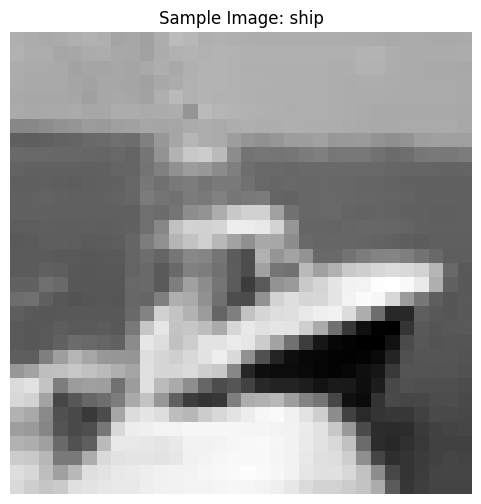

Training set size: (15000, 1024)
Testing set size: (3000, 1024)


In [ ]:
# Display a sample image
plt.figure(figsize=(6, 6))
plt.imshow(X_train_gray[0], cmap='gray')
plt.title(f'Sample Image: {chosen_classes[np.where(class_indices == y_train_subset[0])[0][0]]}')
plt.axis('off')
plt.show()

print("Training set size:", X_train_flat.shape)
print("Testing set size:", X_test_flat.shape)

## Step 3: Training a Machine Learning Model

### What is SVM (Support Vector Machine)?

Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression tasks. However, it is mostly used for classification problems. The objective of the SVM algorithm is to find a hyperplane in an N-dimensional space (N is the number of features) that distinctly classifies the data points.

### Key Concepts:

- **Hyperplane:** A decision boundary that separates different classes in the feature space. In 2D, it's a line; in 3D, it's a plane.
- **Support Vectors:** Data points that are closest to the hyperplane and influence its position and orientation. These points help in maximizing the margin of the classifier.
- **Margin:** The distance between the hyperplane and the closest data points from either class. SVM aims to maximize this margin.

### Why Use SVM?

- **Effective in high-dimensional spaces:** SVM is very effective when the number of features is large.
- **Memory efficient:** It uses a subset of training points (support vectors) in the decision function, making it memory efficient.
- **Versatile:** Different kernel functions can be specified for the decision function. Common kernels include linear, polynomial, and radial basis function (RBF).

### What does `SVC(kernel='linear')` mean?

`SVC` stands for Support Vector Classification, which is a class in the Scikit-Learn library used to implement the SVM algorithm for classification tasks. The `kernel` parameter in the `SVC` class specifies the type of hyperplane used to separate the data.

#### Kernel Types:

- **Linear Kernel:** The data is linearly separable (i.e., a straight line or hyperplane can separate the data). This is the simplest kernel.
  - When we use `SVC(kernel='linear')`, it means we are using a linear kernel for our SVM. This kernel is appropriate when the data can be separated by a straight line (or hyperplane in higher dimensions).
- **Polynomial Kernel:** The data is not linearly separable, but a polynomial function of the input features can separate the data.
- **Radial Basis Function (RBF) Kernel:** The data is not linearly separable, but mapping the data into a higher-dimensional space using a Gaussian (RBF) function can separate the data.

### Training the SVM Model

We will use a Support Vector Machine (SVM) classifier from Scikit-Learn to train our model on the extracted features.


In [ ]:
# Train an SVM classifier
model = SVC(kernel='linear')
model.fit(X_train_flat, y_train_subset.ravel())

# Predict on the test set
y_pred = model.predict(X_test_flat)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_subset, y_pred))
print("Classification Report:\n", classification_report(y_test_subset, y_pred, target_names=chosen_classes))




Accuracy: 0.547
Classification Report:
               precision    recall  f1-score   support

         cat       0.48      0.48      0.48      1000
         dog       0.49      0.48      0.49      1000
        ship       0.66      0.68      0.67      1000

    accuracy                           0.55      3000
   macro avg       0.54      0.55      0.55      3000
weighted avg       0.54      0.55      0.55      3000



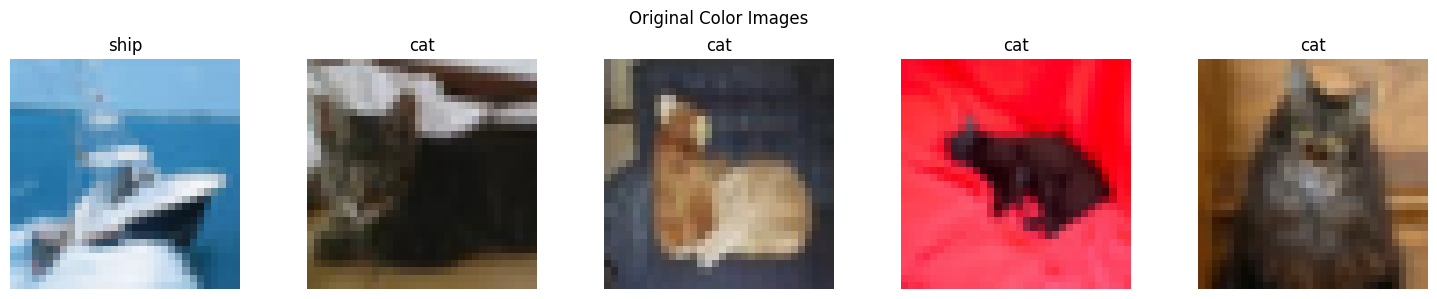

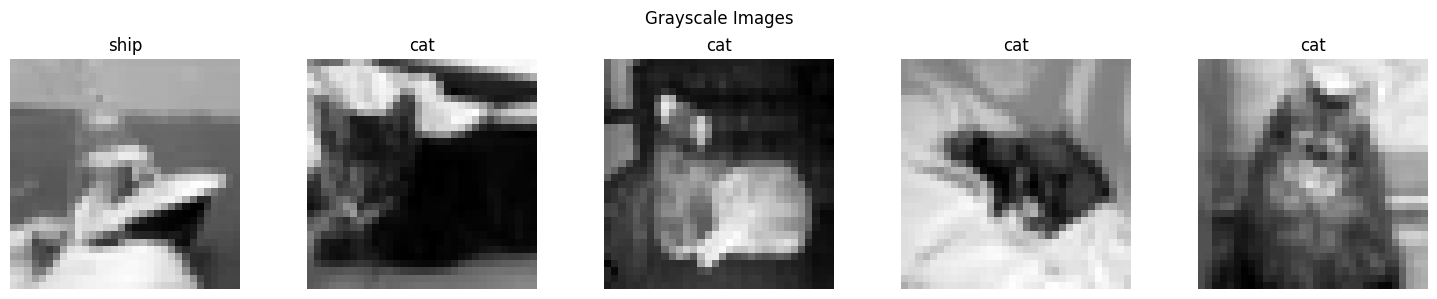

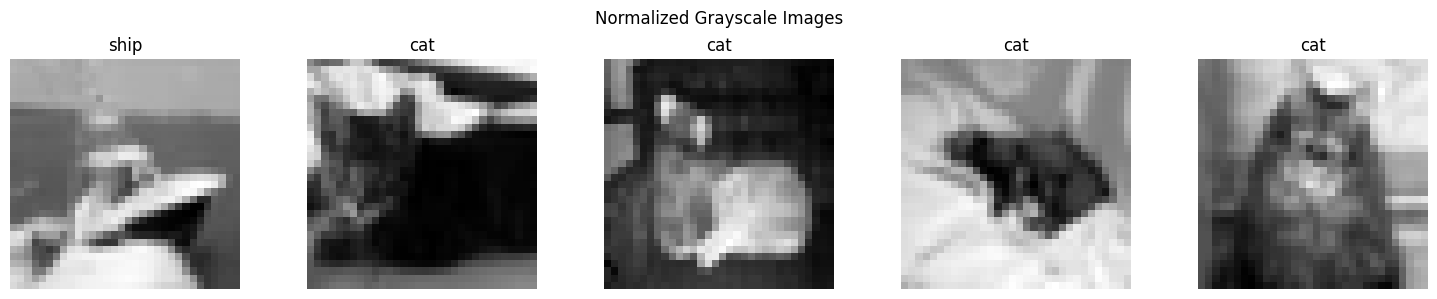

In [ ]:
# Lets see some images of the  datasset in the different stages
# Function to display images
def display_images(images, titles, main_title, cmap=None):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    fig.suptitle(main_title)
    for i, ax in enumerate(axes):
        if cmap:
            ax.imshow(images[i], cmap=cmap)
        else:
            ax.imshow(images[i])
        ax.set_title(titles[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Display original color images
display_images(X_train_subset[:5],
               [chosen_classes[np.where(class_indices == y)[0][0]] for y in y_train_subset[:5]],
               'Original Color Images')

# Display grayscale images
display_images(X_train_gray[:5],
               [chosen_classes[np.where(class_indices == y)[0][0]] for y in y_train_subset[:5]],
               'Grayscale Images', cmap='gray')

# Display normalized images
display_images(X_train_normalized[:5],
               [chosen_classes[np.where(class_indices == y)[0][0]] for y in y_train_subset[:5]],
               'Normalized Grayscale Images', cmap='gray')

## Step 4: Conclusion

In this notebook, we:
1. Loaded and preprocessed the CIFAR-10 dataset.
2. Converted the images to grayscale and flattened them to use as features.
3. Trained an SVM classifier on the extracted features.
4. Evaluated the model's performance.

### Summary of SVM

Support Vector Machines (SVM) are a powerful tool for classification tasks. They work by finding the optimal hyperplane that maximizes the margin between different classes. The key points include:
- **Hyperplane:** The decision boundary.
- **Support Vectors:** Critical data points that define the hyperplane.
- **Margin:** The gap between the hyperplane and the nearest data points from any class.

SVMs are effective in high-dimensional spaces and are versatile due to the use of different kernel functions. However, they can be computationally intensive for large datasets and less effective for overlapping classes.

This exercise provided a basic introduction to image classification using classical machine learning techniques. Next  few modules will explore advanced applications, using deep learning models like Convolutional Neural Networks (CNNs) using libraries such as TensorFlow or PyTorch.


# New Section